In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.palplot(sns.color_palette("Paired"))

In [2]:
train_data = pd.read_csv('../data/train.csv', index_col='bidid')
dev_data = pd.read_csv('../data/validation.csv', index_col='bidid')
test_data = pd.read_csv('../data/test.csv', index_col='bidid')

In [3]:
all_data = pd.concat([train_data,dev_data])

In [4]:
all_data['OS'], all_data['Browser'] = all_data['useragent'].str.split('_').str
all_data = all_data.drop(['useragent'], axis=1)

In [5]:
all_data['slot_size'] = all_data['slotheight'] * all_data['slowidth']

# Week

In [59]:
df1 = all_data['click'].groupby(all_data['weekday']).sum()
df2 = all_data.groupby('weekday').size()
df3 = all_data['payprice'].groupby(all_data['weekday']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['day'] = df.index + 1

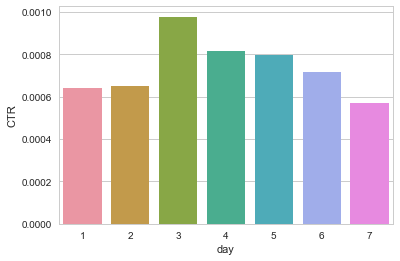

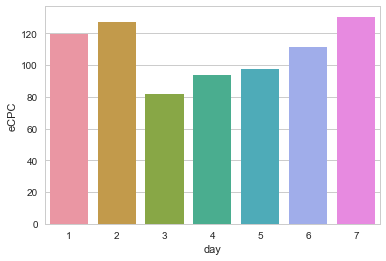

In [92]:
plt.figure()
sns.barplot(x='day', y='CTR', data=df)
plt.show()
sns.barplot(x='day', y='eCPC', data=df)
plt.show()

# Hour

In [146]:
df1 = all_data['click'].groupby(all_data['hour']).sum()
df2 = all_data.groupby('hour').size()
df3 = all_data['payprice'].groupby(all_data['hour']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['hour'] = df.index

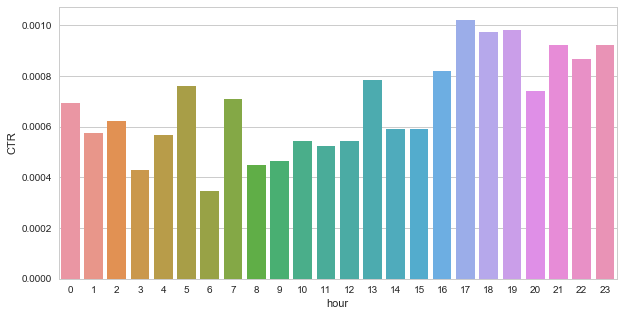

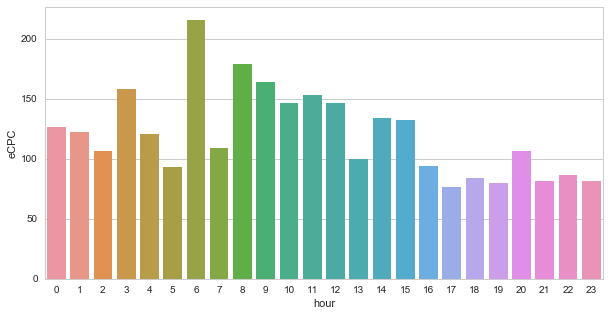

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='CTR', data=df)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='eCPC', data=df)
plt.show()

# OS

In [104]:
df1 = all_data['click'].groupby(all_data['OS']).sum()
df2 = all_data.groupby('OS').size()
df3 = all_data['payprice'].groupby(all_data['OS']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['OS'] = df.index

In [105]:
df

,click,Imp,cost,CTR,eCPC,OS
OS,,,,,,
android,346,72385,5042159,0.004780,14.572714,android
ios,3,438,33907,0.006849,11.302333,ios
linux,4,1766,147517,0.002265,36.879250,linux
mac,170,53921,4284261,0.003153,25.201535,mac
other,2,2068,173621,0.000967,86.810500,other
windows,1470,2604328,204080413,0.000564,138.830213,windows


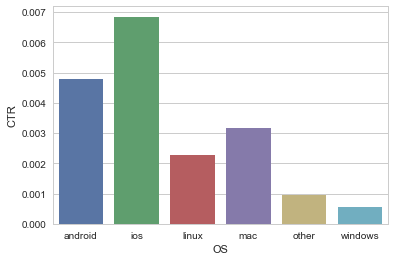

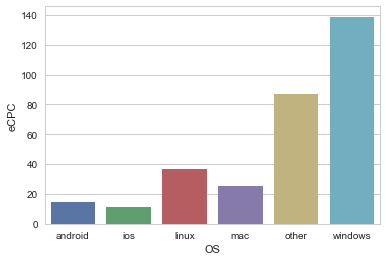

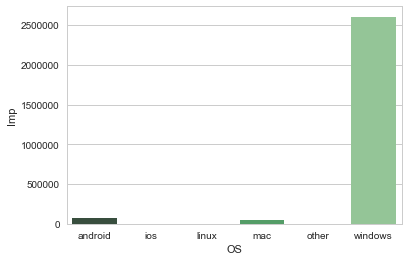

In [133]:
sns.barplot(x='OS', y='CTR', data=df)
plt.show()
sns.barplot(x='OS', y='eCPC', data=df)
plt.show()
sns.barplot(x='OS', y='Imp',data=df, palette='Greens_d')
plt.show()

# Browser

In [15]:
df1 = all_data['click'].groupby(all_data['Browser']).sum()
df2 = all_data.groupby('Browser').size()
df3 = all_data['payprice'].groupby(all_data['Browser']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['Browser'] = df.index

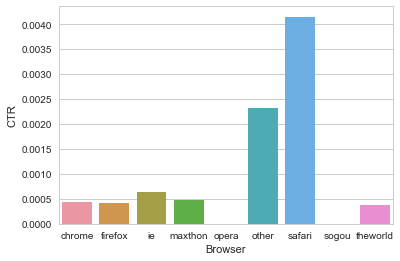

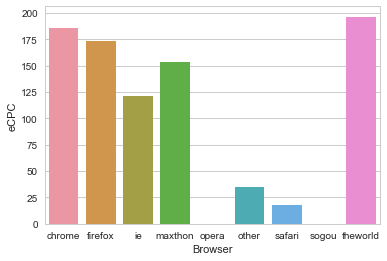

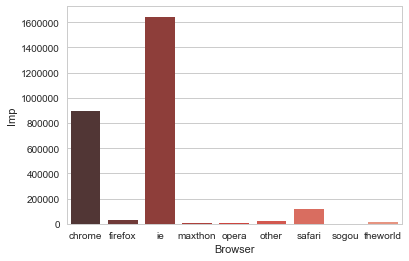

In [16]:
sns.barplot(x='Browser', y='CTR', data=df)
plt.show()
sns.barplot(x='Browser', y='eCPC', data=df)
plt.show()
sns.barplot(x='Browser', y='Imp',data=df, palette='Reds_d')
plt.show()

# Region

In [30]:
df1 = all_data['click'].groupby(all_data['region']).sum()
df2 = all_data.groupby('region').size()
df3 = all_data['payprice'].groupby(all_data['region']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['region'] = df.index

In [31]:
df

,click,Imp,cost,CTR,eCPC,region
region,,,,,,
0,45,58258,4259628,0.000772,94.658400,0
1,87,115344,8966658,0.000754,103.065034,1
2,34,42252,3308753,0.000805,97.316265,2
3,97,122192,9568174,0.000794,98.640969,3
15,72,70995,5596120,0.001014,77.723889,15
27,28,35230,2764167,0.000795,98.720250,27
40,47,91417,7017035,0.000514,149.298617,40
55,36,53777,4065050,0.000669,112.918056,55
65,44,57893,4541752,0.000760,103.221636,65


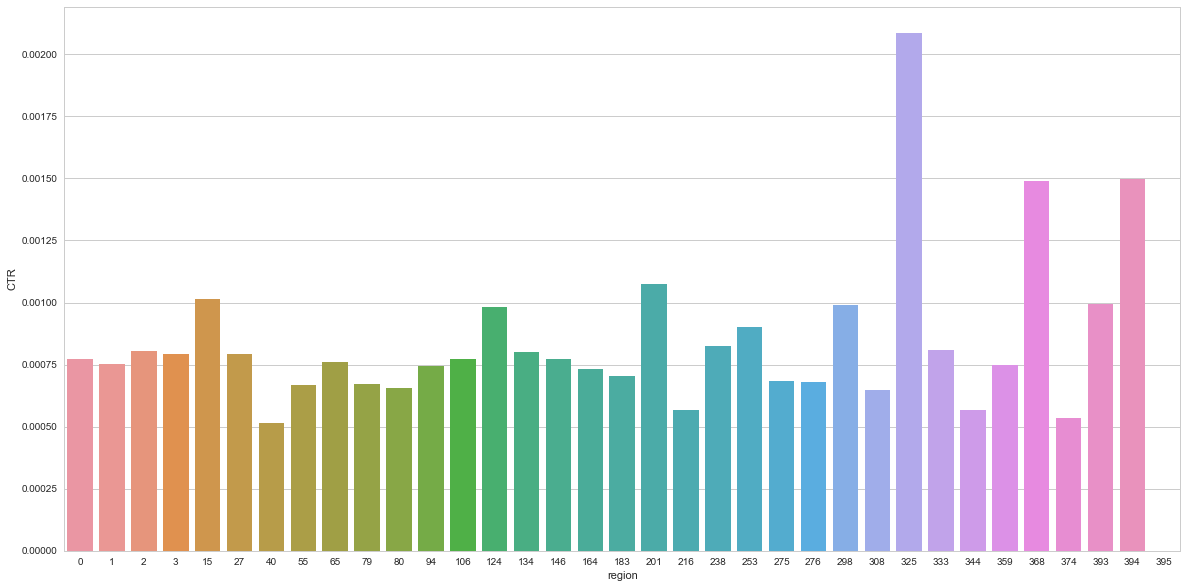

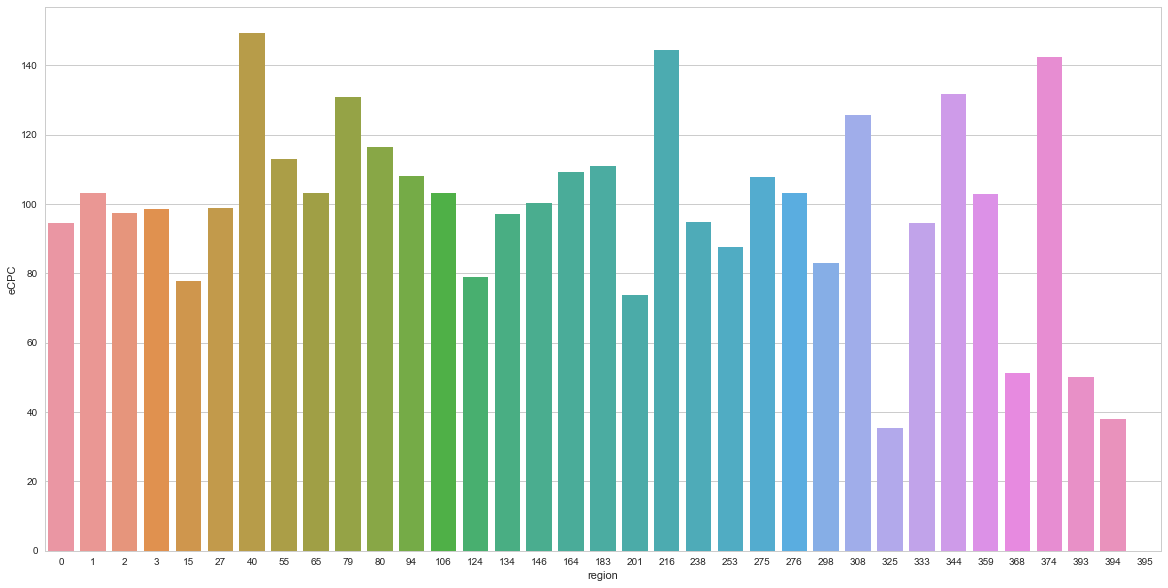

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='CTR', data=df)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='eCPC', data=df)
plt.show()

# Slot Size

In [28]:
all_data['click'].groupby(all_data['slotwidth']).sum()

slotwidth
120      11
125       1
160      92
180       0
200      12
234       0
250      42
300     571
320     243
336     148
360       4
468      27
620       4
640       1
728     252
760       0
910       1
950      65
960      56
980       1
1000    464
Name: click, dtype: int64

In [29]:
all_data['click'].groupby(all_data['slotheight']).sum()

slotheight
50     243
60      31
80       1
90     839
100      0
125      1
150      0
200     12
230      0
240      4
250    612
280    148
300      5
600     99
Name: click, dtype: int64

In [17]:
df1 = all_data['click'].groupby(all_data['slot_size']).sum()
df2 = all_data.groupby('slot_size').size()
df3 = all_data['payprice'].groupby(all_data['slot_size']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['slot_size'] = df.index

In [18]:
df

,click,Imp,cost,CTR,eCPC,slot_size
slot_size,,,,,,
14040,0,352,9499,0.000000,inf,14040
15625,1,78,3381,0.012821,3.381000,15625
16000,243,56005,3518051,0.004339,14.477576,16000
27000,0,163,4949,0.000000,inf,27000
28080,27,53815,3645248,0.000502,135.009185,28080
28800,4,8642,227963,0.000463,56.990750,28800
30000,0,3142,368032,0.000000,inf,30000
37200,4,5661,313389,0.000707,78.347250,37200
40000,12,67577,3745773,0.000178,312.147750,40000


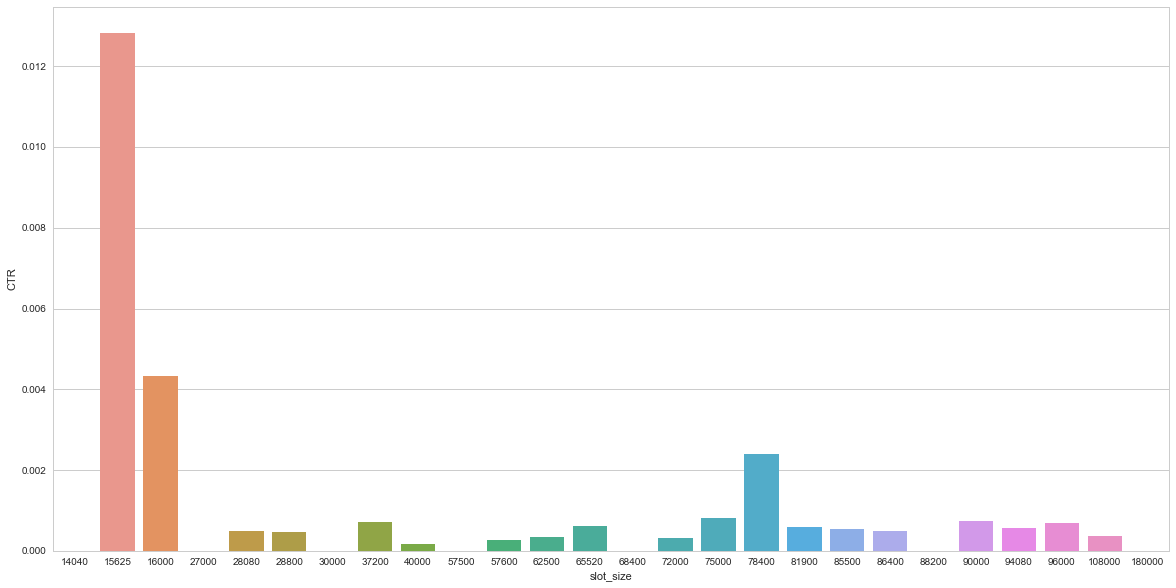

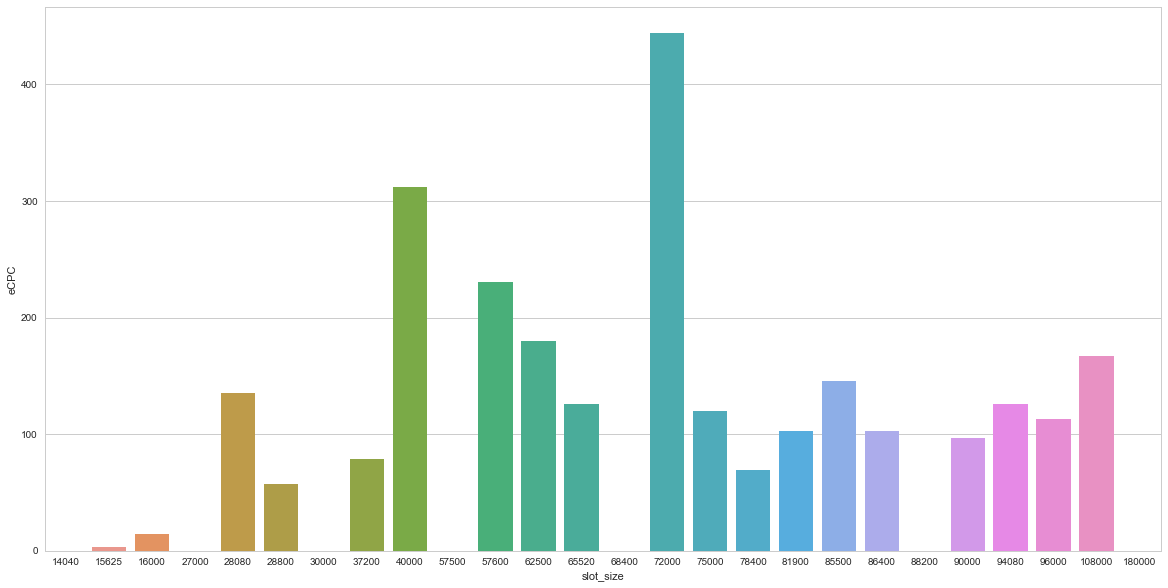

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x='slot_size', y='CTR', data=df)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(x='slot_size', y='eCPC', data=df)
plt.show()

In [13]:
df1 = all_data['click'].groupby(all_data['slotwidth']).sum()
df2 = all_data.groupby('slotwidth').size()
df3 = all_data['payprice'].groupby(all_data['slotwidth']).sum()

df = pd.concat([df1,df2,df3], axis=1)
df.rename(columns={0:'Imp', 'payprice':'cost'}, inplace=True)
df['CTR'] = df['click'] / df['Imp']
df['eCPC'] = df['cost'] / df['click'] / 1000
df['slotwidth'] = df.index

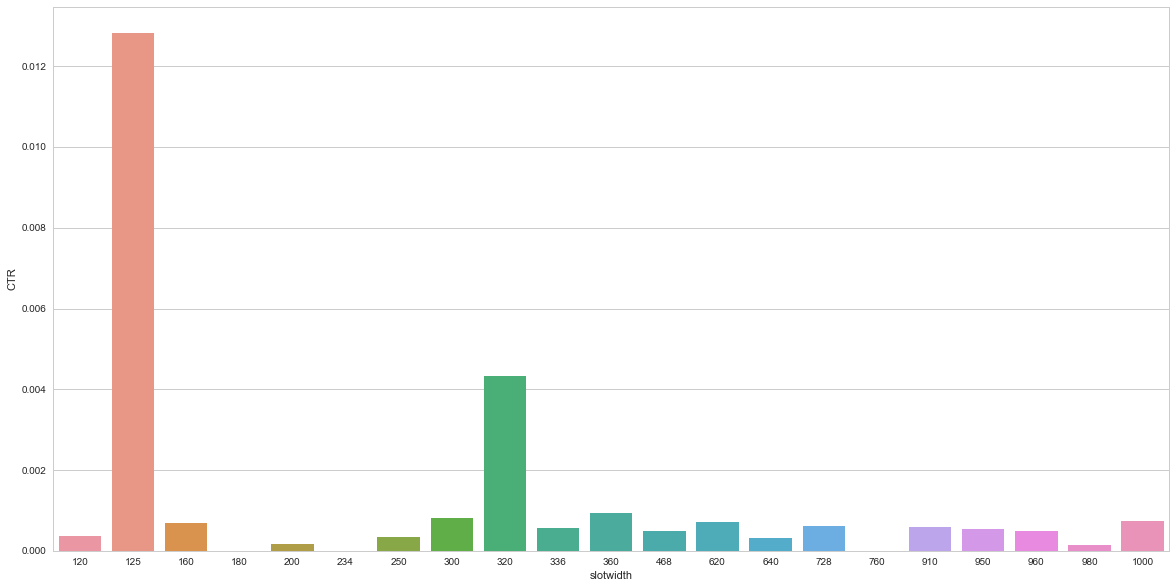

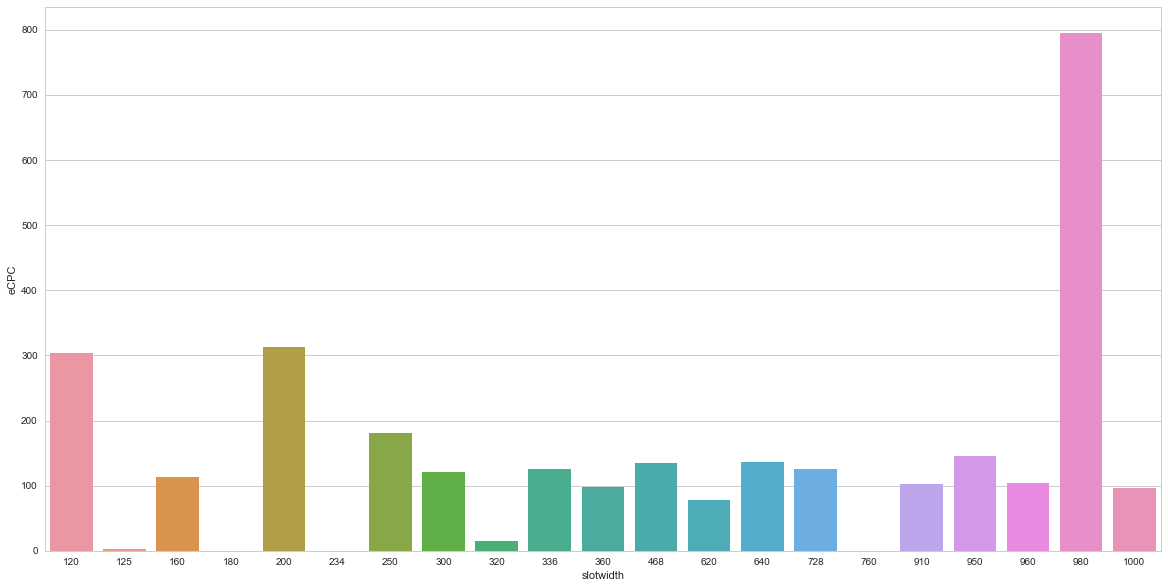

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='slotwidth', y='CTR', data=df)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(x='slotwidth', y='eCPC', data=df)
plt.show()